In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [103]:
data = pd.read_csv("../Diabetics India/diabetes_prediction_india (1).csv")
data.head()

,Age,Gender,BMI,Family_History,Physical_Activity,Diet_Type,Smoking_Status,Alcohol_Intake,Stress_Level,Hypertension,...,Health_Insurance,Regular_Checkups,Medication_For_Chronic_Conditions,Pregnancies,Polycystic_Ovary_Syndrome,Glucose_Tolerance_Test_Result,Vitamin_D_Level,C_Protein_Level,Thyroid_Condition,Diabetes_Status
0,48,Male,35.5,No,High,Non-Vegetarian,Never,NaN,Medium,Yes,...,No,No,No,0,0,124.3,31.5,7.46,Yes,Yes
1,18,Other,28.7,Yes,Medium,Non-Vegetarian,Current,Moderate,High,No,...,Yes,Yes,No,0,0,151.4,12.5,5.64,Yes,No
2,21,Other,30.0,Yes,High,Non-Vegetarian,Current,Moderate,High,Yes,...,No,No,Yes,0,0,106.1,35.8,7.20,No,Yes
3,25,Female,25.6,No,Medium,Vegetarian,Former,Moderate,High,Yes,...,No,No,Yes,1,No,85.6,15.4,6.53,Yes,No
4,78,Male,38.8,No,High,Non-Vegetarian,Current,High,High,No,...,No,No,Yes,0,0,77.0,28.6,0.58,No,Yes


In [104]:
data.columns

Index(['Age', 'Gender', 'BMI', 'Family_History', 'Physical_Activity',
       'Diet_Type', 'Smoking_Status', 'Alcohol_Intake', 'Stress_Level',
       'Hypertension', 'Cholesterol_Level', 'Fasting_Blood_Sugar',
       'Postprandial_Blood_Sugar', 'HBA1C', 'Heart_Rate', 'Waist_Hip_Ratio',
       'Urban_Rural', 'Health_Insurance', 'Regular_Checkups',
       'Medication_For_Chronic_Conditions', 'Pregnancies',
       'Polycystic_Ovary_Syndrome', 'Glucose_Tolerance_Test_Result',
       'Vitamin_D_Level', 'C_Protein_Level', 'Thyroid_Condition',
       'Diabetes_Status'],
      dtype='object')

In [105]:
data.dtypes

Age                                    int64
Gender                                object
BMI                                  float64
Family_History                        object
Physical_Activity                     object
Diet_Type                             object
Smoking_Status                        object
Alcohol_Intake                        object
Stress_Level                          object
Hypertension                          object
Cholesterol_Level                    float64
Fasting_Blood_Sugar                  float64
Postprandial_Blood_Sugar             float64
HBA1C                                float64
Heart_Rate                             int64
Waist_Hip_Ratio                      float64
Urban_Rural                           object
Health_Insurance                      object
Regular_Checkups                      object
Medication_For_Chronic_Conditions     object
Pregnancies                            int64
Polycystic_Ovary_Syndrome             object
Glucose_To

In [106]:
data.shape

(5292, 27)

In [107]:
data.isna().sum()

Age                                     0
Gender                                  0
BMI                                     0
Family_History                          0
Physical_Activity                       0
Diet_Type                               0
Smoking_Status                          0
Alcohol_Intake                       1780
Stress_Level                            0
Hypertension                            0
Cholesterol_Level                       0
Fasting_Blood_Sugar                     0
Postprandial_Blood_Sugar                0
HBA1C                                   0
Heart_Rate                              0
Waist_Hip_Ratio                         0
Urban_Rural                             0
Health_Insurance                        0
Regular_Checkups                        0
Medication_For_Chronic_Conditions       0
Pregnancies                             0
Polycystic_Ovary_Syndrome               0
Glucose_Tolerance_Test_Result           0
Vitamin_D_Level                   

In [108]:
data.duplicated().sum()

0

In [109]:
for col in data.columns:
    if data[col].dtypes == 'object':
        print(f"Unique values in {col}: {data[col].unique()}")

Unique values in Gender: ['Male' 'Other' 'Female']
Unique values in Family_History: ['No' 'Yes']
Unique values in Physical_Activity: ['High' 'Medium' 'Low']
Unique values in Diet_Type: ['Non-Vegetarian' 'Vegetarian' 'Vegan']
Unique values in Smoking_Status: ['Never' 'Current' 'Former']
Unique values in Alcohol_Intake: [nan 'Moderate' 'High']
Unique values in Stress_Level: ['Medium' 'High' 'Low']
Unique values in Hypertension: ['Yes' 'No']
Unique values in Urban_Rural: ['Urban' 'Rural']
Unique values in Health_Insurance: ['No' 'Yes']
Unique values in Regular_Checkups: ['No' 'Yes']
Unique values in Medication_For_Chronic_Conditions: ['No' 'Yes']
Unique values in Polycystic_Ovary_Syndrome: ['0' 'No' 'Yes']
Unique values in Thyroid_Condition: ['Yes' 'No']
Unique values in Diabetes_Status: ['Yes' 'No']


In [110]:
data['Alcohol_Intake'].unique()

array([nan, 'Moderate', 'High'], dtype=object)

In [111]:
data['Alcohol_Intake']=data['Alcohol_Intake'].fillna('None')
data['Alcohol_Intake'].unique()

array(['None', 'Moderate', 'High'], dtype=object)

In [112]:
data.isna().sum()

Age                                  0
Gender                               0
BMI                                  0
Family_History                       0
Physical_Activity                    0
Diet_Type                            0
Smoking_Status                       0
Alcohol_Intake                       0
Stress_Level                         0
Hypertension                         0
Cholesterol_Level                    0
Fasting_Blood_Sugar                  0
Postprandial_Blood_Sugar             0
HBA1C                                0
Heart_Rate                           0
Waist_Hip_Ratio                      0
Urban_Rural                          0
Health_Insurance                     0
Regular_Checkups                     0
Medication_For_Chronic_Conditions    0
Pregnancies                          0
Polycystic_Ovary_Syndrome            0
Glucose_Tolerance_Test_Result        0
Vitamin_D_Level                      0
C_Protein_Level                      0
Thyroid_Condition        

In [120]:
x = data.drop('Diabetes_Status',axis=1)
x

,Age,BMI,Cholesterol_Level,Fasting_Blood_Sugar,Postprandial_Blood_Sugar,HBA1C,Heart_Rate,Waist_Hip_Ratio,Pregnancies,Glucose_Tolerance_Test_Result,...,Stress_Level_Low,Stress_Level_Medium,Hypertension_Yes,Urban_Rural_Urban,Health_Insurance_Yes,Regular_Checkups_Yes,Medication_For_Chronic_Conditions_Yes,Polycystic_Ovary_Syndrome_No,Polycystic_Ovary_Syndrome_Yes,Thyroid_Condition_Yes
0,48,35.5,111.7,141.0,165.6,8.9,94,0.91,0,124.3,...,False,True,True,True,False,False,False,False,False,True
1,18,28.7,130.6,83.1,142.6,5.9,68,0.96,0,151.4,...,False,False,False,False,True,True,False,False,False,True
2,21,30.0,294.8,159.9,212.4,4.8,70,0.88,0,106.1,...,False,False,True,False,False,False,True,False,False,False
3,25,25.6,159.1,133.3,225.4,11.9,78,0.98,1,85.6,...,False,False,True,False,False,False,True,True,False,True
4,78,38.8,215.0,164.9,218.1,11.6,65,0.85,0,77.0,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,35,39.0,203.6,126.5,188.0,9.2,119,1.05,0,174.6,...,True,False,True,False,True,False,True,False,False,True
5288,44,32.0,214.8,162.6,127.1,7.5,108,0.92,0,119.3,...,False,False,True,True,True,True,False,False,False,True
5289,55,22.3,168.3,70.8,237.6,8.1,110,1.12,0,143.6,...,True,False,True,True,False,False,True,False,False,True
5290,65,21.7,275.1,169.9,198.4,10.6,114,0.92,0,79.8,...,True,False,True,False,False,False,True,False,False,False


In [121]:
y = data['Diabetes_Status']
y

0       Yes
1        No
2       Yes
3        No
4       Yes
       ... 
5287     No
5288    Yes
5289    Yes
5290    Yes
5291    Yes
Name: Diabetes_Status, Length: 5292, dtype: object

In [122]:
for col in x.columns:
    if x[col].dtype == 'object':
        x = pd.get_dummies(x,columns=[col],drop_first=True)

In [123]:
x.head()

,Age,BMI,Cholesterol_Level,Fasting_Blood_Sugar,Postprandial_Blood_Sugar,HBA1C,Heart_Rate,Waist_Hip_Ratio,Pregnancies,Glucose_Tolerance_Test_Result,...,Stress_Level_Low,Stress_Level_Medium,Hypertension_Yes,Urban_Rural_Urban,Health_Insurance_Yes,Regular_Checkups_Yes,Medication_For_Chronic_Conditions_Yes,Polycystic_Ovary_Syndrome_No,Polycystic_Ovary_Syndrome_Yes,Thyroid_Condition_Yes
0,48,35.5,111.7,141.0,165.6,8.9,94,0.91,0,124.3,...,False,True,True,True,False,False,False,False,False,True
1,18,28.7,130.6,83.1,142.6,5.9,68,0.96,0,151.4,...,False,False,False,False,True,True,False,False,False,True
2,21,30.0,294.8,159.9,212.4,4.8,70,0.88,0,106.1,...,False,False,True,False,False,False,True,False,False,False
3,25,25.6,159.1,133.3,225.4,11.9,78,0.98,1,85.6,...,False,False,True,False,False,False,True,True,False,True
4,78,38.8,215.0,164.9,218.1,11.6,65,0.85,0,77.0,...,False,False,False,True,False,False,True,False,False,False


In [124]:
x.dtypes

Age                                        int64
BMI                                      float64
Cholesterol_Level                        float64
Fasting_Blood_Sugar                      float64
Postprandial_Blood_Sugar                 float64
HBA1C                                    float64
Heart_Rate                                 int64
Waist_Hip_Ratio                          float64
Pregnancies                                int64
Glucose_Tolerance_Test_Result            float64
Vitamin_D_Level                          float64
C_Protein_Level                          float64
Gender_Male                                 bool
Gender_Other                                bool
Family_History_Yes                          bool
Physical_Activity_Low                       bool
Physical_Activity_Medium                    bool
Diet_Type_Vegan                             bool
Diet_Type_Vegetarian                        bool
Smoking_Status_Former                       bool
Smoking_Status_Never

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


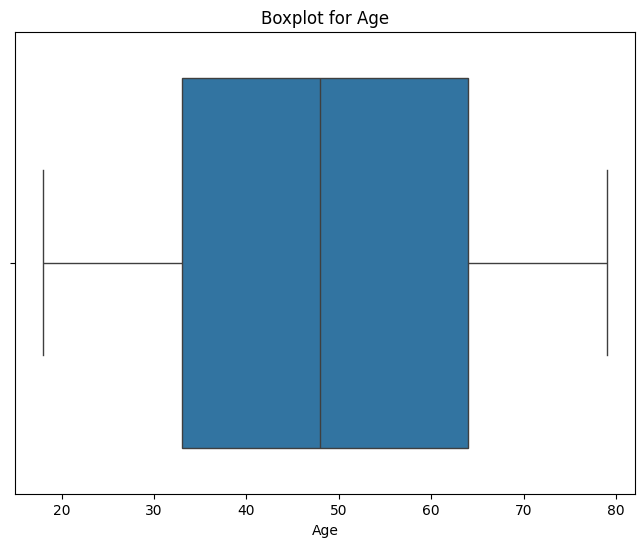

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


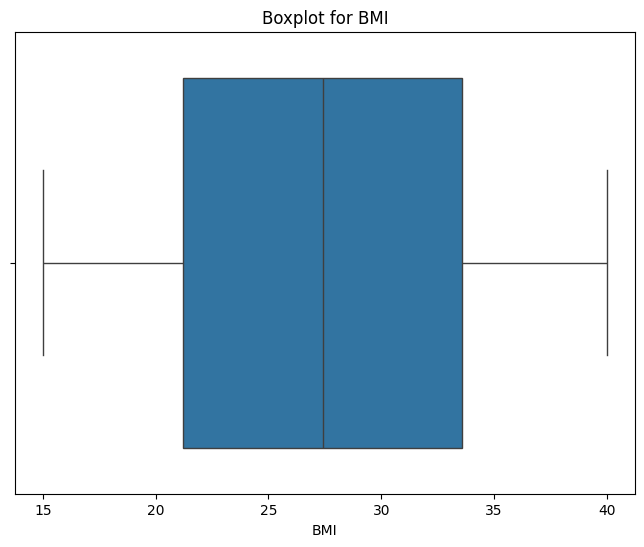

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


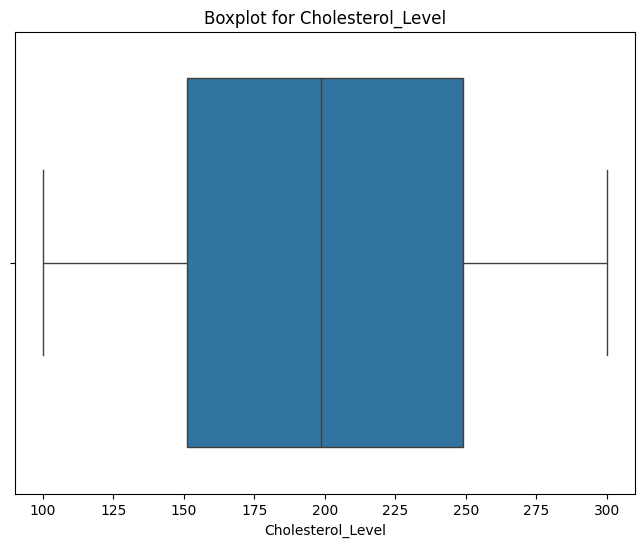

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


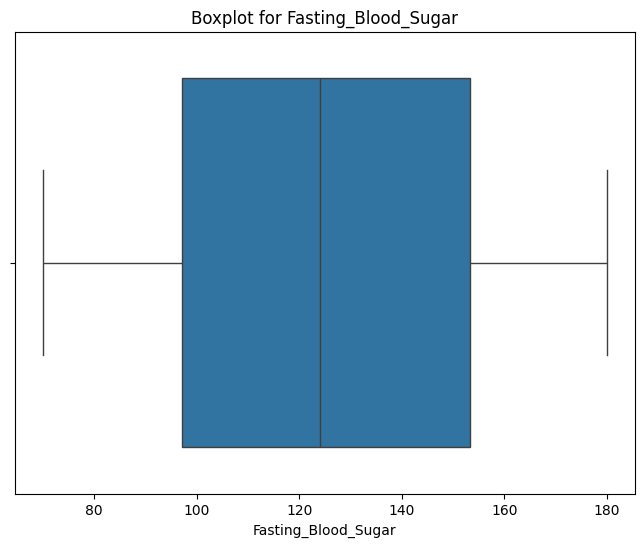

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


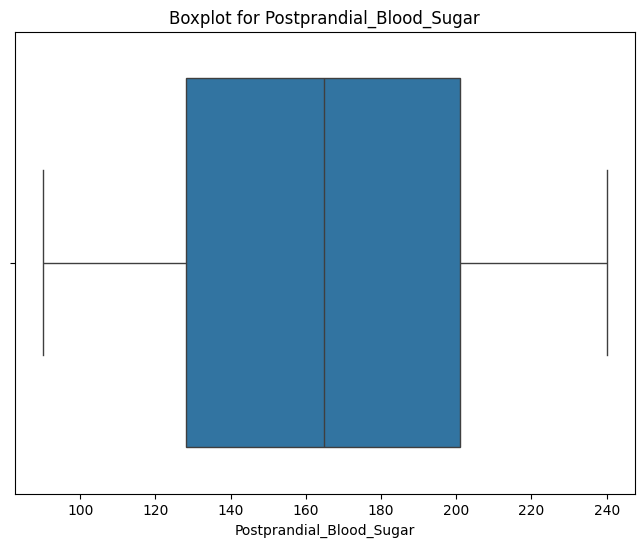

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


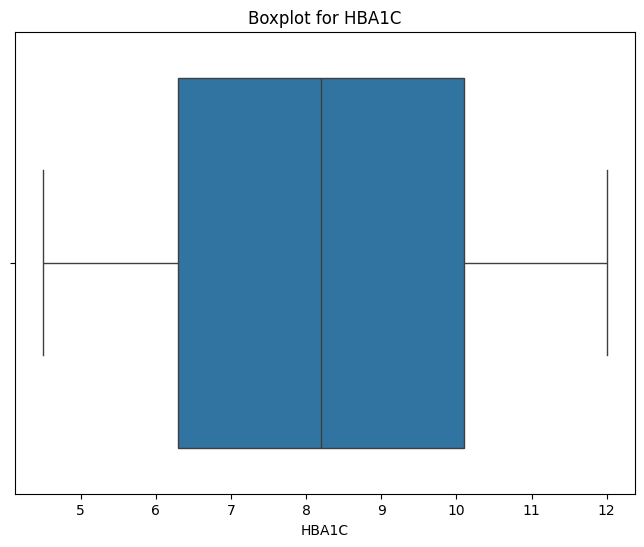

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


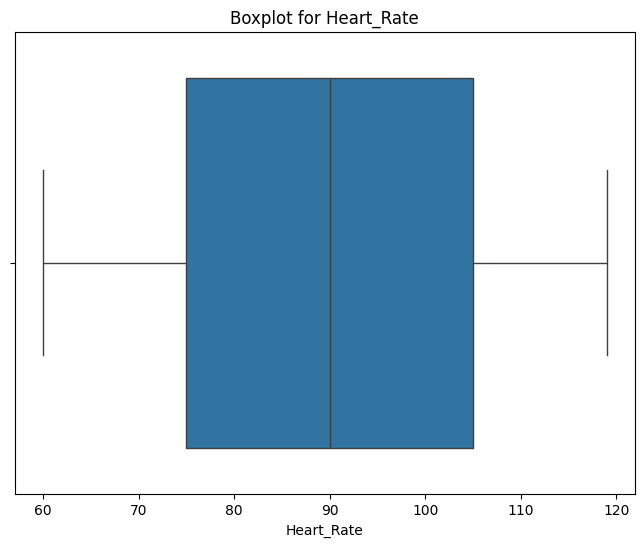

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


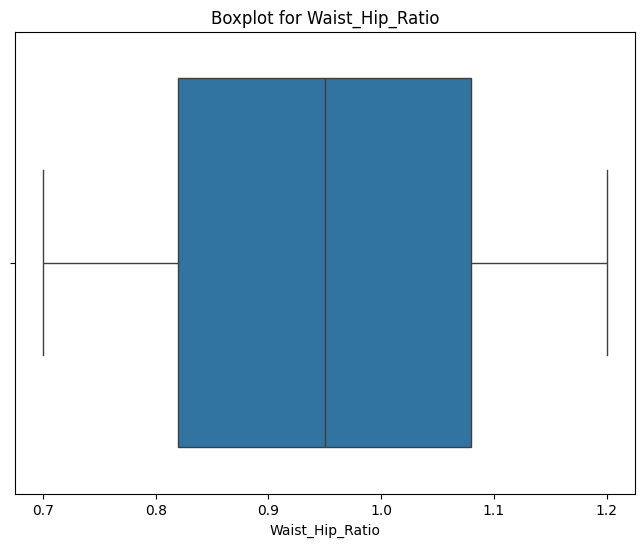

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


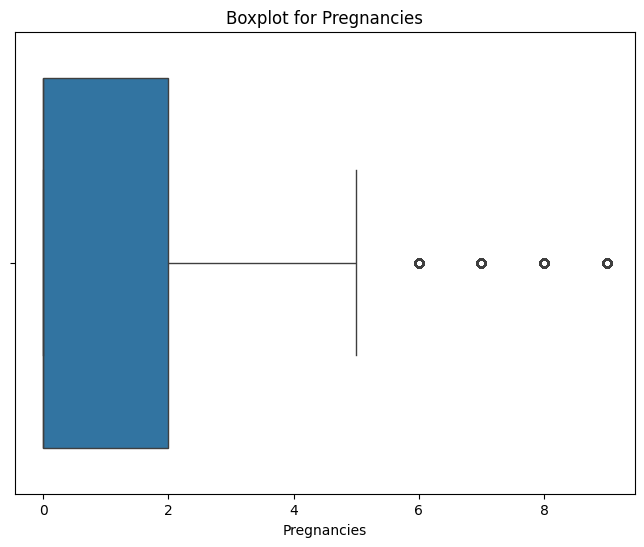

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


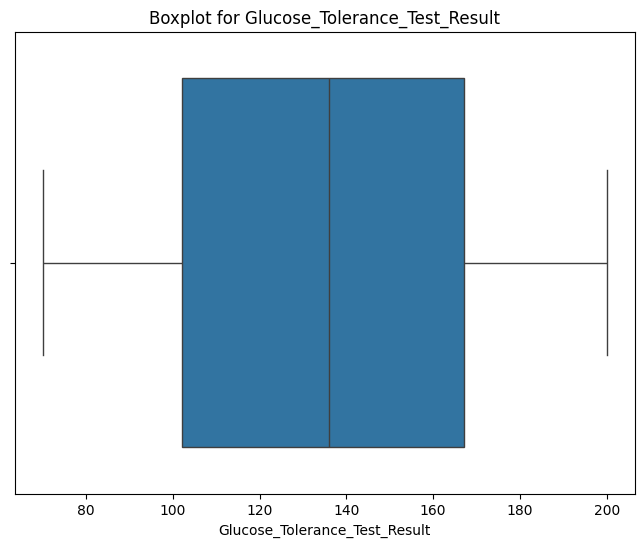

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


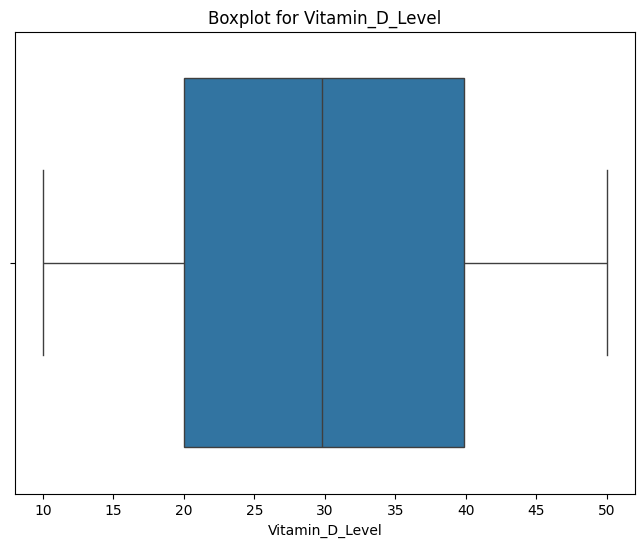

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


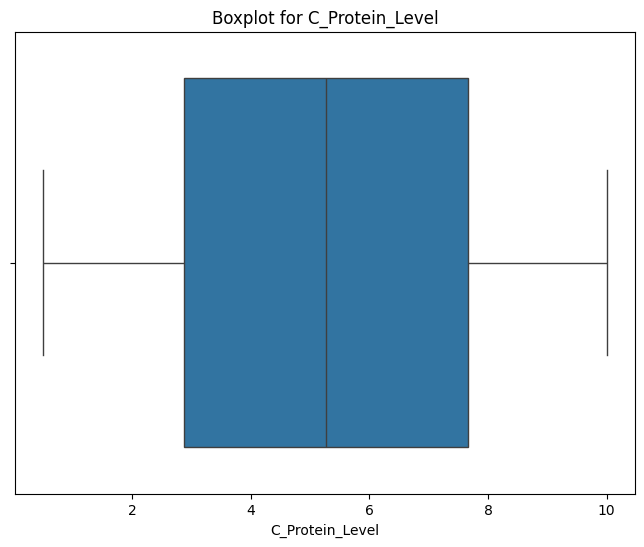

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


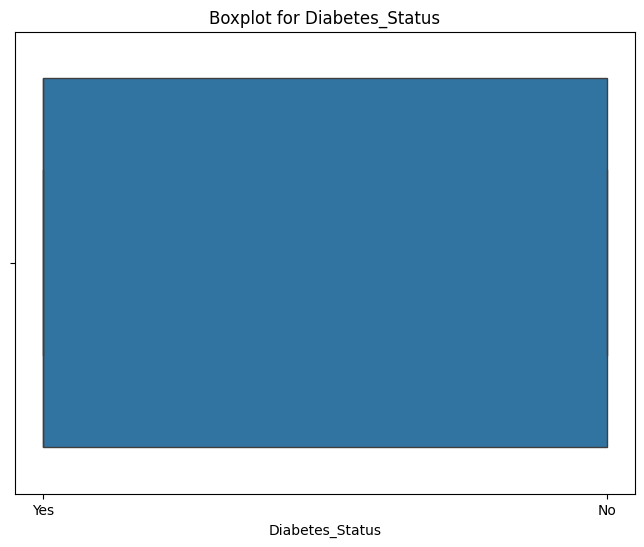

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


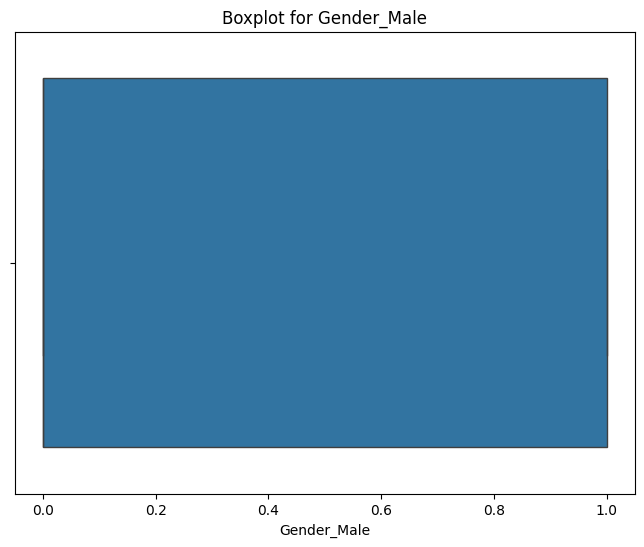

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


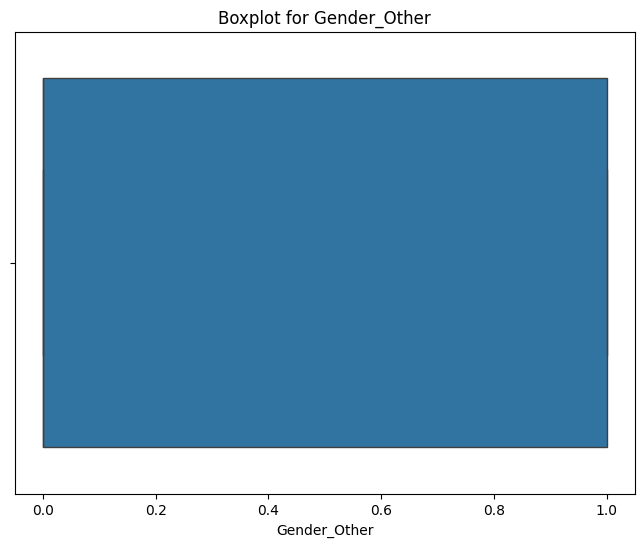

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


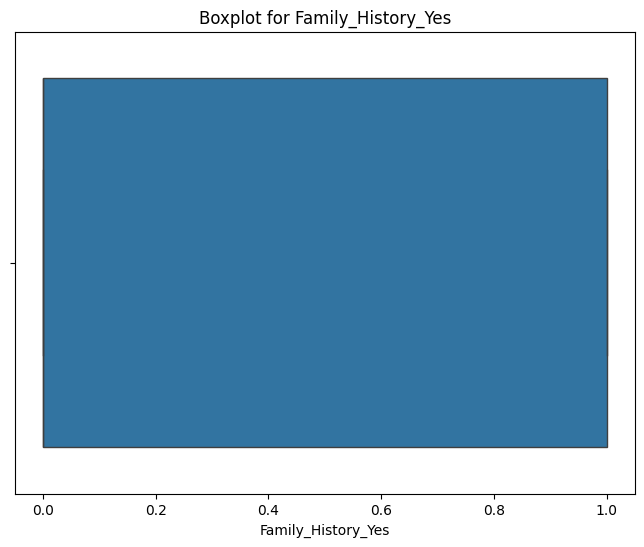

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


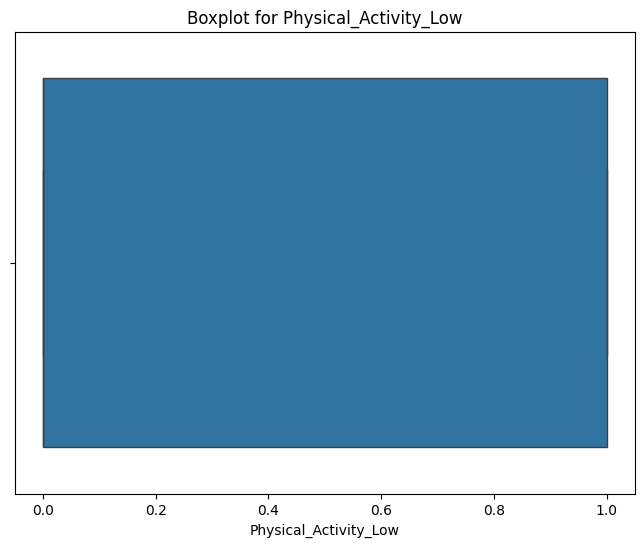

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


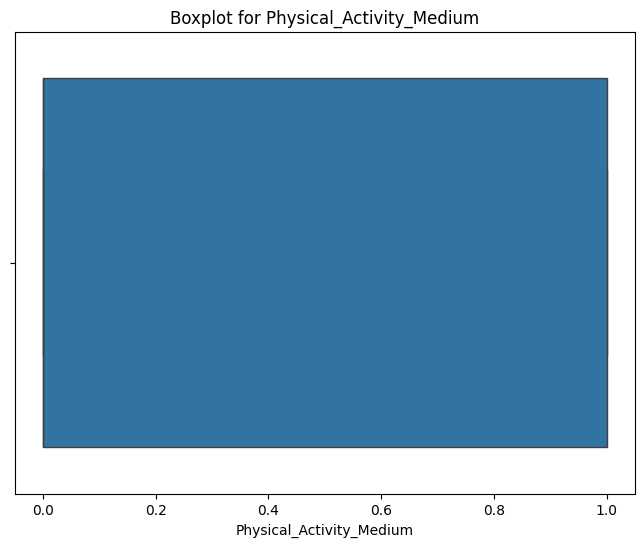

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


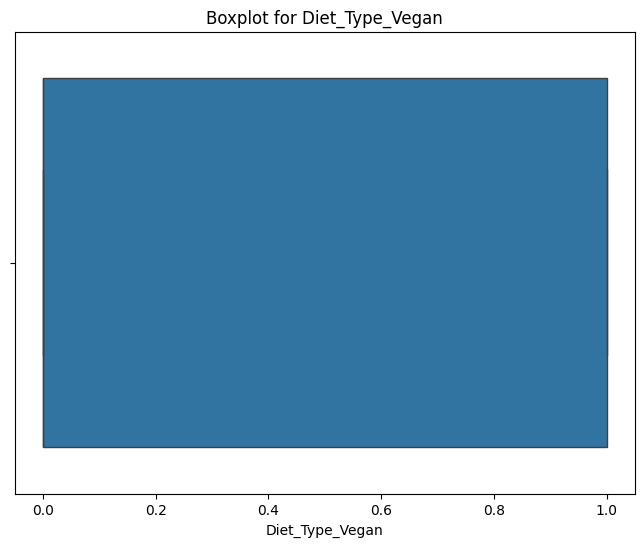

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


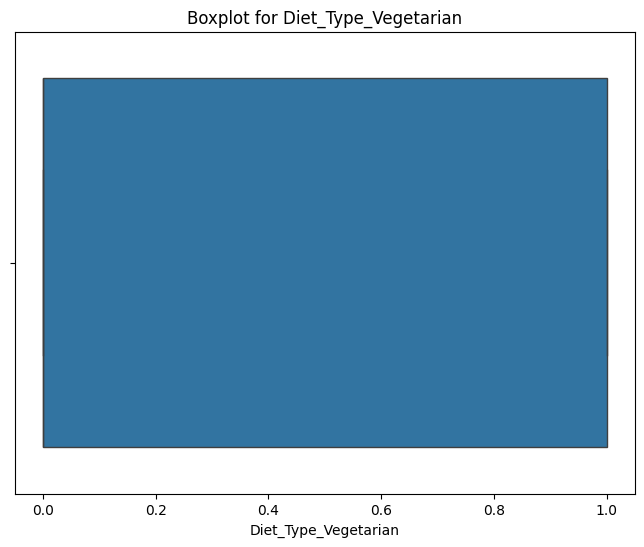

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


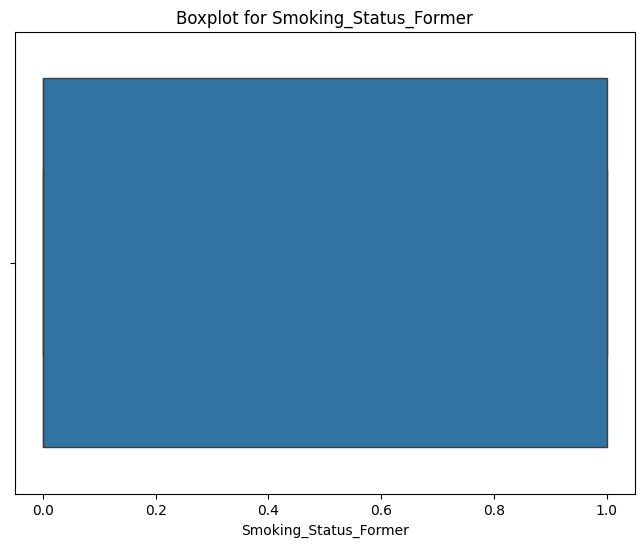

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


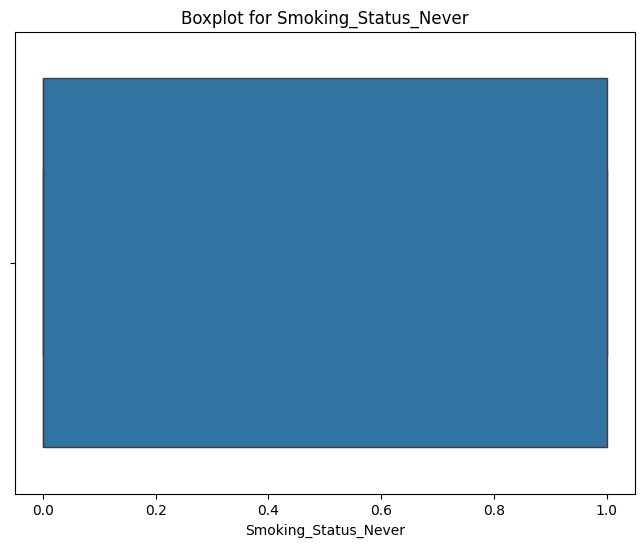

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


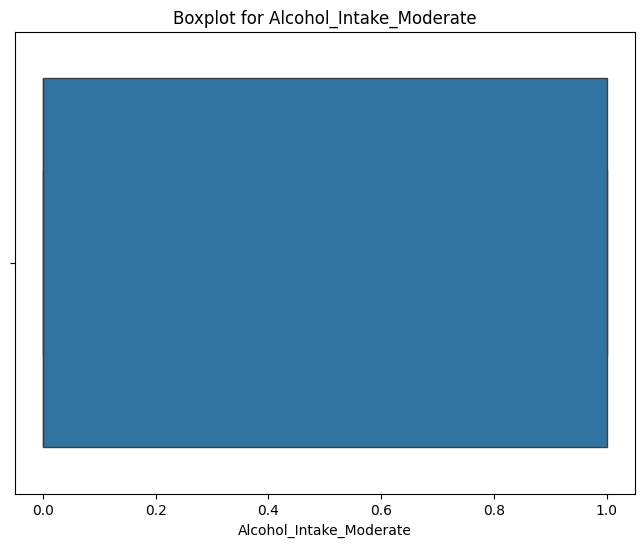

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


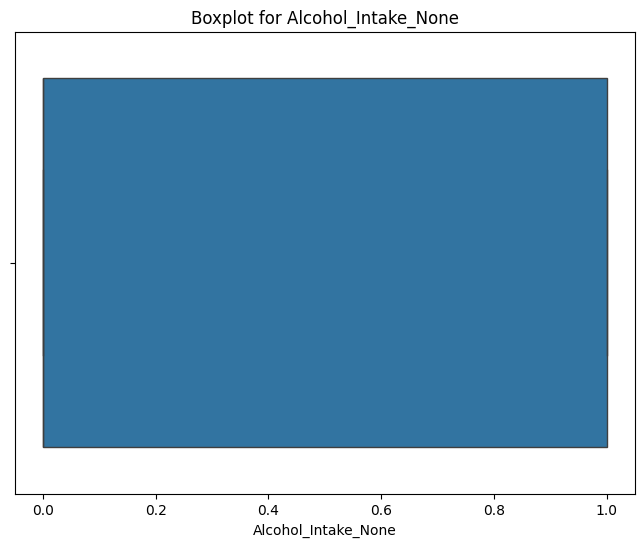

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


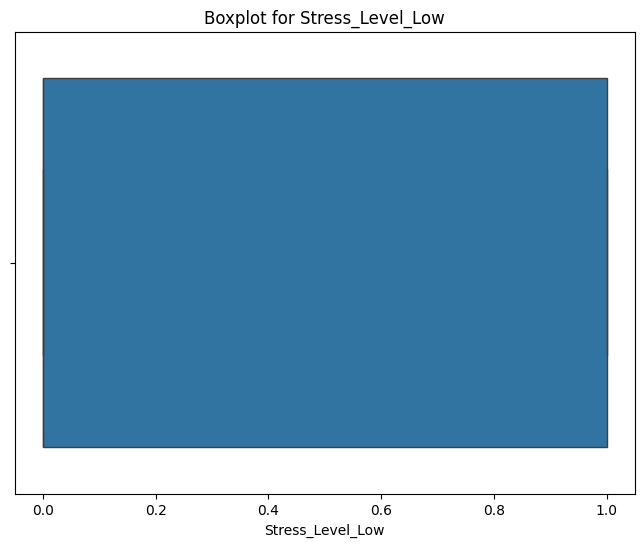

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


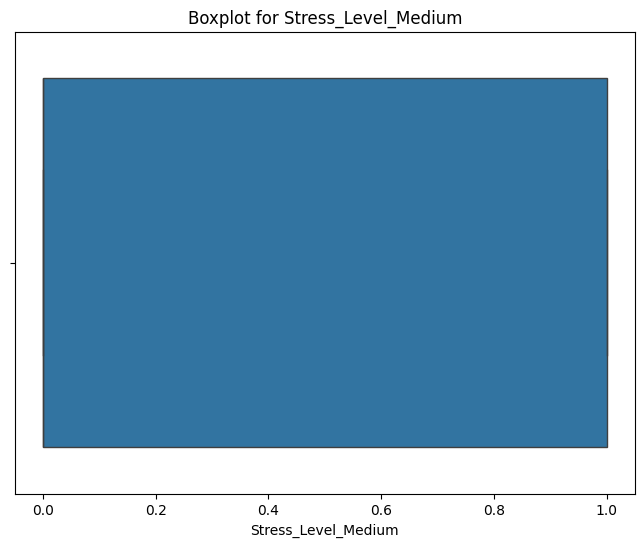

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


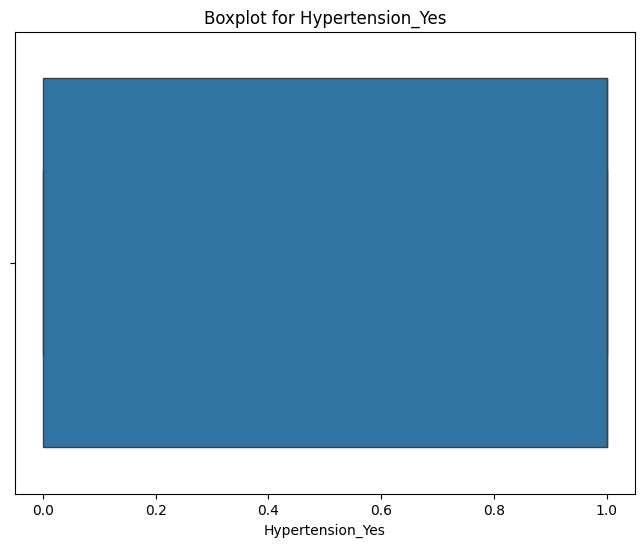

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


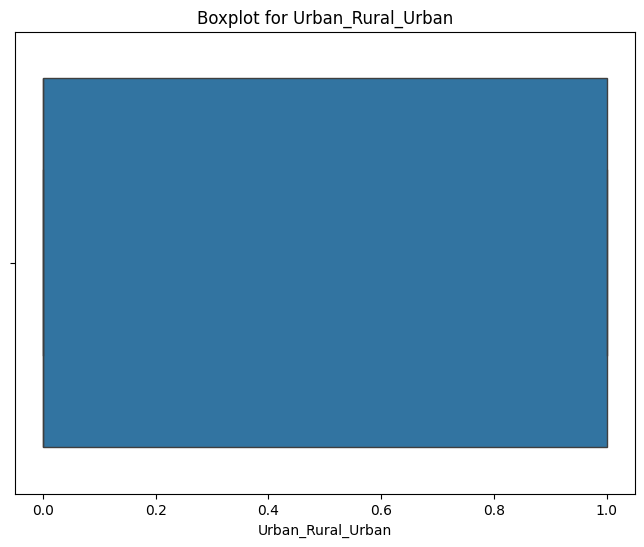

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


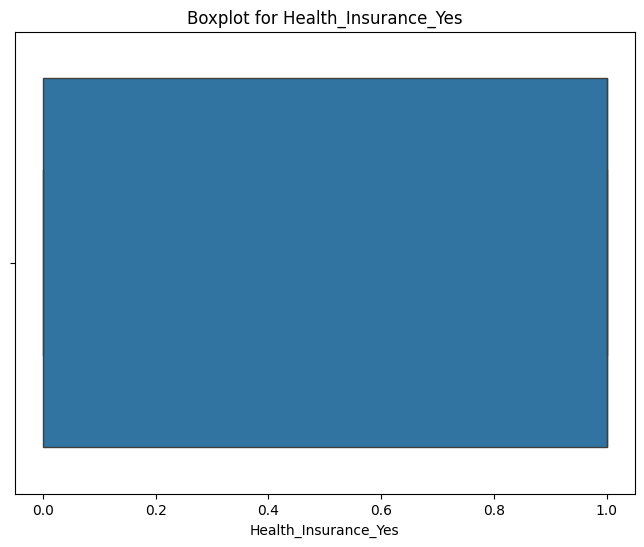

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


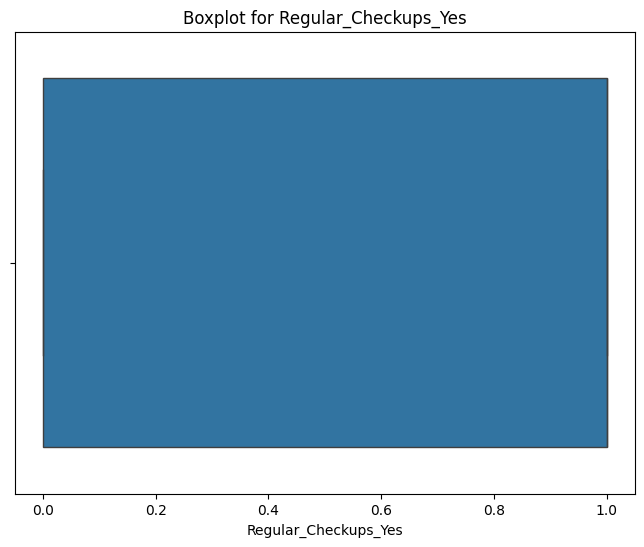

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


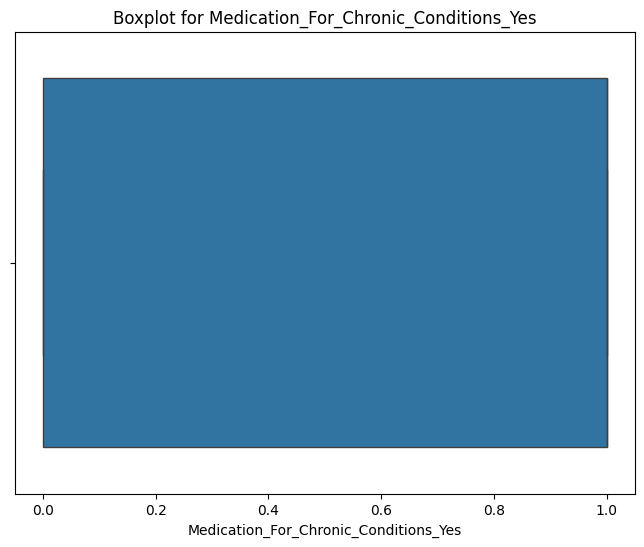

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


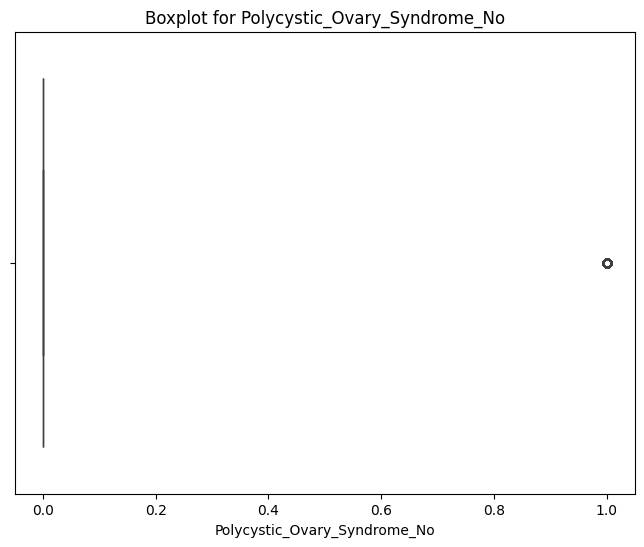

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


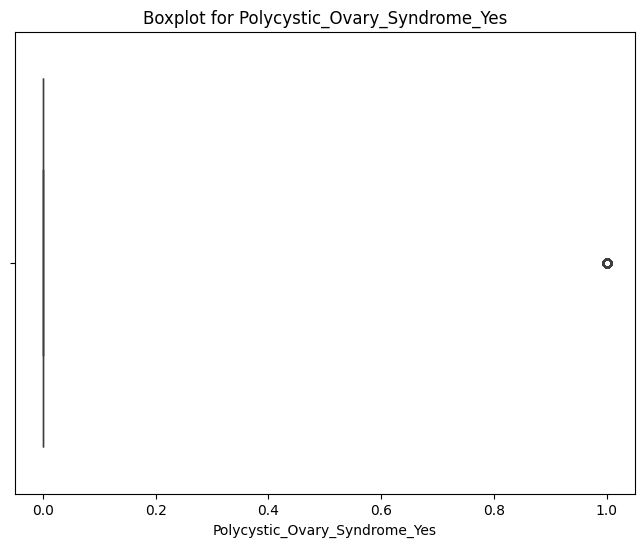

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


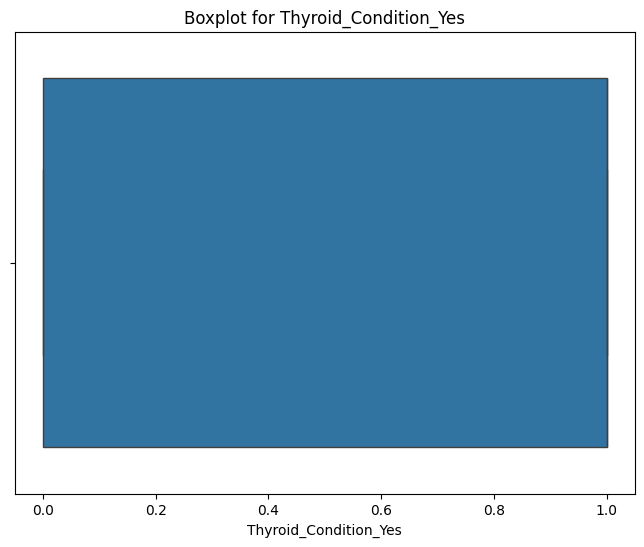

In [116]:
for col in data.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [125]:
for col in x.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    x[col] = x[col].clip(lower=lower_bound,upper=upper_bound)

In [128]:
x.columns

Index(['Age', 'BMI', 'Cholesterol_Level', 'Fasting_Blood_Sugar',
       'Postprandial_Blood_Sugar', 'HBA1C', 'Heart_Rate', 'Waist_Hip_Ratio',
       'Pregnancies', 'Glucose_Tolerance_Test_Result', 'Vitamin_D_Level',
       'C_Protein_Level', 'Gender_Male', 'Gender_Other', 'Family_History_Yes',
       'Physical_Activity_Low', 'Physical_Activity_Medium', 'Diet_Type_Vegan',
       'Diet_Type_Vegetarian', 'Smoking_Status_Former', 'Smoking_Status_Never',
       'Alcohol_Intake_Moderate', 'Alcohol_Intake_None', 'Stress_Level_Low',
       'Stress_Level_Medium', 'Hypertension_Yes', 'Urban_Rural_Urban',
       'Health_Insurance_Yes', 'Regular_Checkups_Yes',
       'Medication_For_Chronic_Conditions_Yes', 'Polycystic_Ovary_Syndrome_No',
       'Polycystic_Ovary_Syndrome_Yes', 'Thyroid_Condition_Yes'],
      dtype='object')

In [130]:
y

0       Yes
1        No
2       Yes
3        No
4       Yes
       ... 
5287     No
5288    Yes
5289    Yes
5290    Yes
5291    Yes
Name: Diabetes_Status, Length: 5292, dtype: object

In [131]:
y = pd.get_dummies(y,drop_first=True)

In [132]:
y

,Yes
0,True
1,False
2,True
3,False
4,True
...,...
5287,False
5288,True
5289,True
5290,True


In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [135]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [136]:
classifiers = {
    'Random Forest Classifier':RandomForestClassifier(n_estimators=47,random_state=34),
    'Logistic Regression' : LogisticRegression(random_state=42),
    'SVM':SVC(kernel='linear'),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes':GaussianNB(),
    'Decision tree' : DecisionTreeClassifier(random_state=42,max_depth=5),
    'Gradient Boosting':GradientBoostingClassifier(n_estimators=600,learning_rate=0.05,random_state=42),
    'AdaBoost':AdaBoostClassifier(n_estimators=50,random_state=42,learning_rate=0.3),
}

In [137]:
results=[]

In [138]:
for name,clf in classifiers.items():
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    cm_result = confusion_matrix(y_test, y_pred)  
    cr_result = classification_report(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    print(f'{name} Confusion Matrix:\n{cm_result}')
    print(f'{name} Classification Report:\n{cr_result}')
    print("\n\n")
    results.append({'Model Name':name,'Accuracy Score':accuracy*100})

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Classifier Accuracy: 47.98%
Random Forest Classifier Confusion Matrix:
[[348 423]
 [403 414]]
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

       False       0.46      0.45      0.46       771
        True       0.49      0.51      0.50       817

    accuracy                           0.48      1588
   macro avg       0.48      0.48      0.48      1588
weighted avg       0.48      0.48      0.48      1588






/Users/ajoy/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ajoy/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ajoy/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

Logistic Regression Accuracy: 48.93%
Logistic Regression Confusion Matrix:
[[295 476]
 [335 482]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.47      0.38      0.42       771
        True       0.50      0.59      0.54       817

    accuracy                           0.49      1588
   macro avg       0.49      0.49      0.48      1588
weighted avg       0.49      0.49      0.48      1588




SVM Accuracy: 48.55%
SVM Confusion Matrix:
[[299 472]
 [345 472]]
SVM Classification Report:
              precision    recall  f1-score   support

       False       0.46      0.39      0.42       771
        True       0.50      0.58      0.54       817

    accuracy                           0.49      1588
   macro avg       0.48      0.48      0.48      1588
weighted avg       0.48      0.49      0.48      1588






/Users/ajoy/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN Accuracy: 51.20%
KNN Confusion Matrix:
[[357 414]
 [361 456]]
KNN Classification Report:
              precision    recall  f1-score   support

       False       0.50      0.46      0.48       771
        True       0.52      0.56      0.54       817

    accuracy                           0.51      1588
   macro avg       0.51      0.51      0.51      1588
weighted avg       0.51      0.51      0.51      1588




Naive Bayes Accuracy: 49.87%
Naive Bayes Confusion Matrix:
[[351 420]
 [376 441]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

       False       0.48      0.46      0.47       771
        True       0.51      0.54      0.53       817

    accuracy                           0.50      1588
   macro avg       0.50      0.50      0.50      1588
weighted avg       0.50      0.50      0.50      1588




Decision tree Accuracy: 51.57%
Decision tree Confusion Matrix:
[[ 35 736]
 [ 33 784]]
Decision tree Classification Report:
       

/Users/ajoy/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ajoy/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Accuracy: 49.31%
Gradient Boosting Confusion Matrix:
[[332 439]
 [366 451]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

       False       0.48      0.43      0.45       771
        True       0.51      0.55      0.53       817

    accuracy                           0.49      1588
   macro avg       0.49      0.49      0.49      1588
weighted avg       0.49      0.49      0.49      1588






/Users/ajoy/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ajoy/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 47.48%
AdaBoost Confusion Matrix:
[[219 552]
 [282 535]]
AdaBoost Classification Report:
              precision    recall  f1-score   support

       False       0.44      0.28      0.34       771
        True       0.49      0.65      0.56       817

    accuracy                           0.47      1588
   macro avg       0.46      0.47      0.45      1588
weighted avg       0.47      0.47      0.46      1588






In [139]:
models = pd.DataFrame(results)
df_unique = models.drop_duplicates(subset=['Model Name'], keep='last')
df_unique

,Model Name,Accuracy Score
0,Random Forest Classifier,47.984887
1,Logistic Regression,48.929471
2,SVM,48.551637
3,KNN,51.196474
4,Naive Bayes,49.874055
5,Decision tree,51.574307
6,Gradient Boosting,49.307305
7,AdaBoost,47.481108


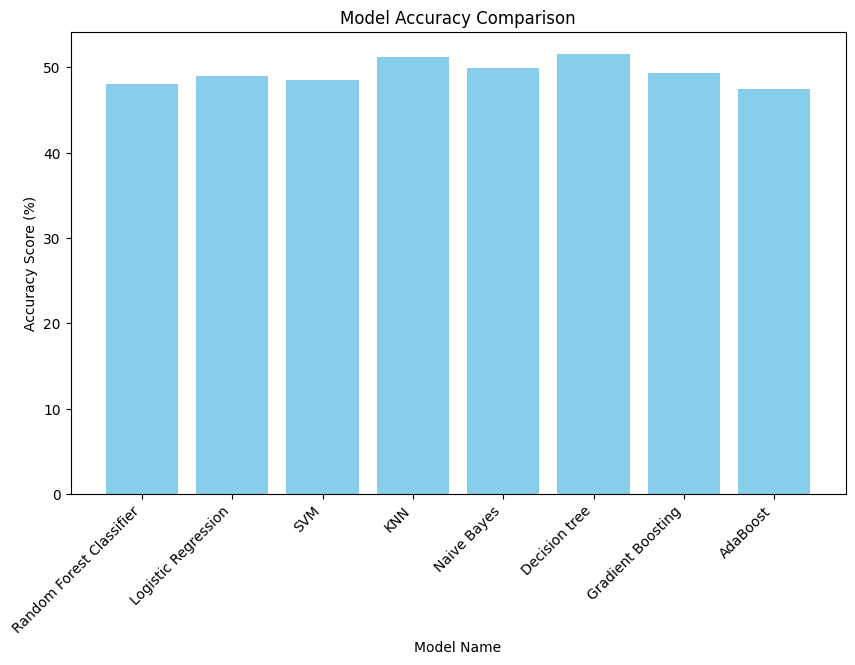

In [140]:
# Plotting the accuracy scores
plt.figure(figsize=(10,6))
plt.bar(df_unique['Model Name'], df_unique['Accuracy Score'], color='skyblue')
plt.xlabel('Model Name')
plt.ylabel('Accuracy Score (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
plt.show()